Importing libraries and data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Importing dataset
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# Dropping 'Id' because it is not of use for this model
df.drop('Id', axis=1, inplace=True)

Encoding

In [4]:
le = preprocessing.LabelEncoder()

# Encode labels in column 'Species'. 
df['Species']= le.fit_transform(df['Species']) 

Building model

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
# Splitting data
X = df.drop('Species', axis=1)
y = df['Species']

# Reshaping and scaling data
X = preprocessing.scale(X)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

Evaluating model

Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 3000x1500 with 0 Axes>

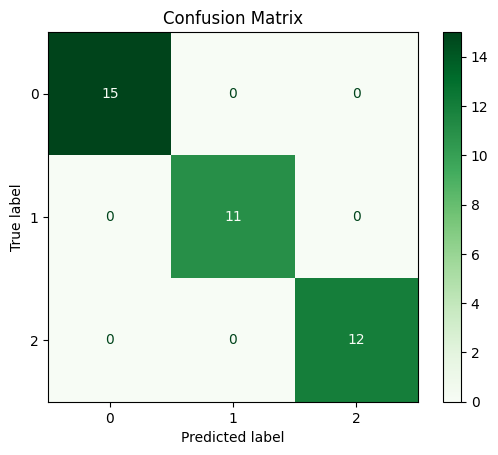

In [9]:
# Confusion matrix
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
plt.figure(figsize=(30,15))
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')

0 = Iris-setosa

1 = Iris-versicolor

2 = Iris-virginica

In [10]:
# Printed evaluations
print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))

Accuracy Score: 1.0
Confusion Matrix: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [11]:
accuracy_logistic = accuracy_score(y_test, y_pred)
print('LogisticRegression model accuracy is: {:.2f}%'.format(accuracy_logistic*100))

LogisticRegression model accuracy is: 100.00%
